#***Importing necessary Libraries***

In [2]:
# Import NumPy, which can deal with multi-dimensional arrays such as matrix intuitively.
import numpy as np # A useful package for dealing with mathematical processes
import pandas as pd # A common package for viewing tabular data
import matplotlib.pyplot as plt # We will be using Matplotlib for our graphs
import seaborn as sns; sns.set()  # for plot styling
from google.colab import drive
drive.mount('/content/drive')
import sklearn.datasets # We want to be able to access the sklearn datasets again
from sklearn.metrics import  accuracy_score, precision_score, recall_score, f1_score, balanced_accuracy_score # required for evaluating classification models
from sklearn.preprocessing import StandardScaler # We will be using the inbuilt preprocessing functions sklearn provides
from sklearn.model_selection import train_test_split # A library that can automatically perform data splitting for us

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Data Exploration**

In [3]:
# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/ML-Sem2/Coursework/COMP1801_Coursework_Dataset.csv')

In [4]:
# Display the first few rows of the dataset
print(data.head())

   Lifespan partType microstructure  coolingRate  quenchTime  forgeTime  \
0   1469.17   Nozzle      equiGrain           13        3.84       6.47   
1   1793.64    Block    singleGrain           19        2.62       3.48   
2    700.60    Blade      equiGrain           28        0.76       1.34   
3   1082.10   Nozzle       colGrain            9        2.01       2.19   
4   1838.83    Blade       colGrain           16        4.13       3.87   

   HeatTreatTime  Nickel%  Iron%  Cobalt%  Chromium%  smallDefects  \
0          46.87    65.73  16.52    16.82       0.93            10   
1          44.70    54.22  35.38     6.14       4.26            19   
2           9.54    51.83  35.95     8.81       3.41            35   
3          20.29    57.03  23.33    16.86       2.78             0   
4          16.13    59.62  27.37    11.45       1.56            10   

   largeDefects  sliverDefects seedLocation    castType  
0             0              0       Bottom         Die  
1           

In [5]:
# Check the structure and data types
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Lifespan        1000 non-null   float64
 1   partType        1000 non-null   object 
 2   microstructure  1000 non-null   object 
 3   coolingRate     1000 non-null   int64  
 4   quenchTime      1000 non-null   float64
 5   forgeTime       1000 non-null   float64
 6   HeatTreatTime   1000 non-null   float64
 7   Nickel%         1000 non-null   float64
 8   Iron%           1000 non-null   float64
 9   Cobalt%         1000 non-null   float64
 10  Chromium%       1000 non-null   float64
 11  smallDefects    1000 non-null   int64  
 12  largeDefects    1000 non-null   int64  
 13  sliverDefects   1000 non-null   int64  
 14  seedLocation    1000 non-null   object 
 15  castType        1000 non-null   object 
dtypes: float64(8), int64(4), object(4)
memory usage: 125.1+ KB
None


In [6]:
# Get summary statistics for numerical columns
print(data.describe())

          Lifespan  coolingRate   quenchTime    forgeTime  HeatTreatTime  \
count  1000.000000  1000.000000  1000.000000  1000.000000    1000.000000   
mean   1298.556320    17.639000     2.764230     5.464600      30.194510   
std     340.071434     7.491783     1.316979     2.604513      16.889415   
min     417.990000     5.000000     0.500000     1.030000       1.030000   
25%    1047.257500    11.000000     1.640000     3.170000      16.185000   
50%    1266.040000    18.000000     2.755000     5.475000      29.365000   
75%    1563.050000    24.000000     3.970000     7.740000      44.955000   
max    2134.530000    30.000000     4.990000    10.000000      59.910000   

           Nickel%        Iron%      Cobalt%    Chromium%  smallDefects  \
count  1000.000000  1000.000000  1000.000000  1000.000000   1000.000000   
mean     60.243080    24.553580    12.434690     2.768650     17.311000   
std       5.790475     7.371737     4.333197     1.326496     12.268365   
min      50.020

***EDA***

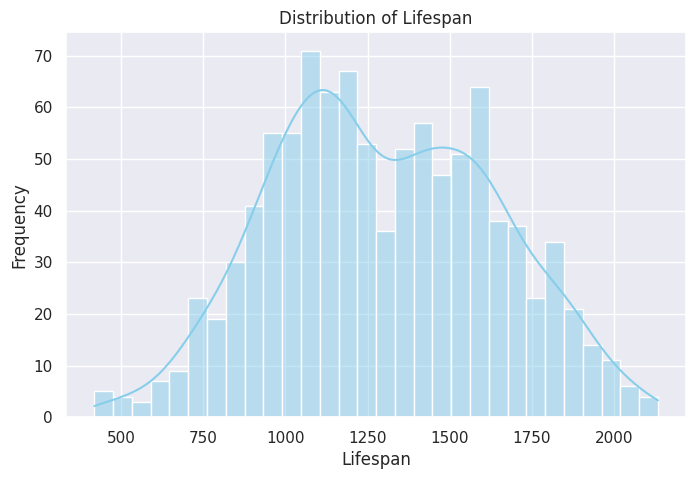

In [7]:
# Plot the distribution of the target variable (lifespan)
plt.figure(figsize=(8, 5))
sns.histplot(data['Lifespan'], kde=True, bins=30, color='skyblue')
plt.title('Distribution of Lifespan')
plt.xlabel('Lifespan')
plt.ylabel('Frequency')
plt.show()

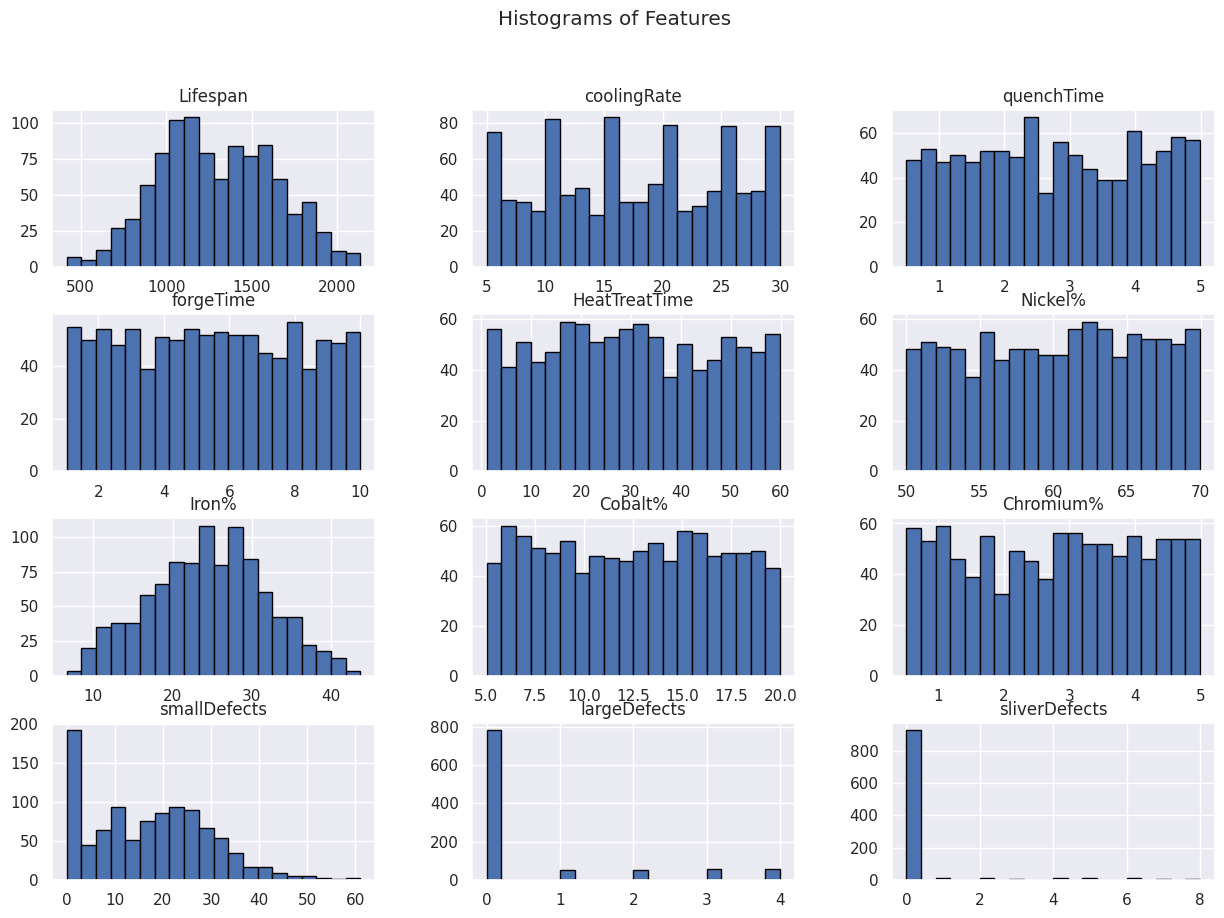

In [8]:
# Plot histograms for  features
data.hist(figsize=(15, 10), bins=20, edgecolor='black')
plt.suptitle('Histograms of Features')
plt.show()

The histograms provide insights into the distribution of various features affecting product lifespan. The lifespan distribution is right-skewed, indicating a majority of shorter lifespans. Other features like cooling rate, quench time, and material composition seem to have a more uniform distribution. Understanding these distributions can help identify factors influencing product lifespan and guide potential improvements.

**Exploring Categorical Features**

In [9]:
# Get unique values for categorical features
categorical_features = data.select_dtypes(include=['object']).columns.tolist()

for feature in categorical_features:
    print(f"{feature}'s Unique Values List: {data[feature].unique()}")

partType's Unique Values List: ['Nozzle' 'Block' 'Blade' 'Valve']
microstructure's Unique Values List: ['equiGrain' 'singleGrain' 'colGrain']
seedLocation's Unique Values List: ['Bottom' 'Top']
castType's Unique Values List: ['Die' 'Investment' 'Continuous']


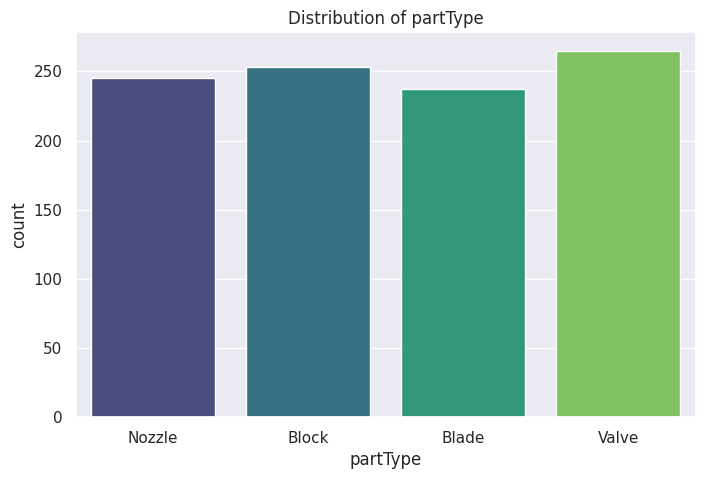

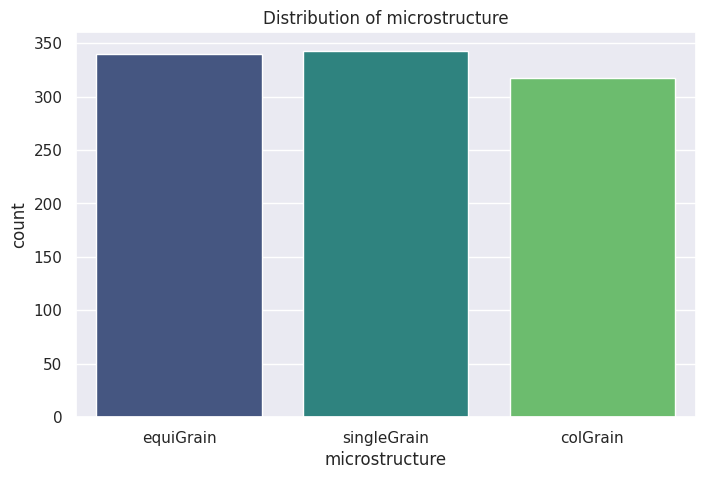

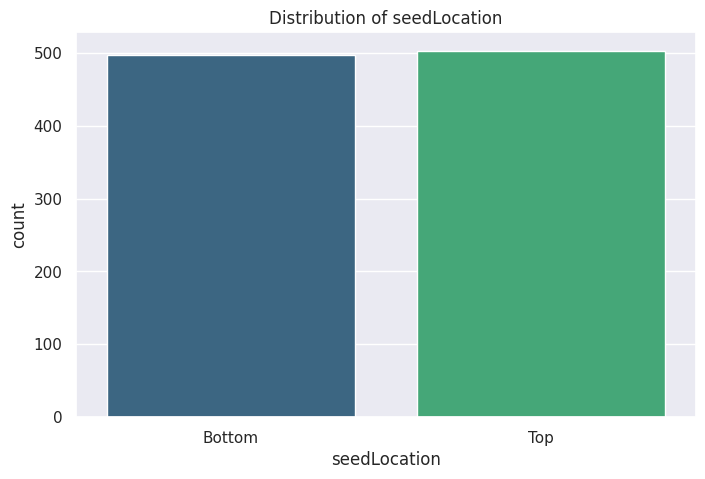

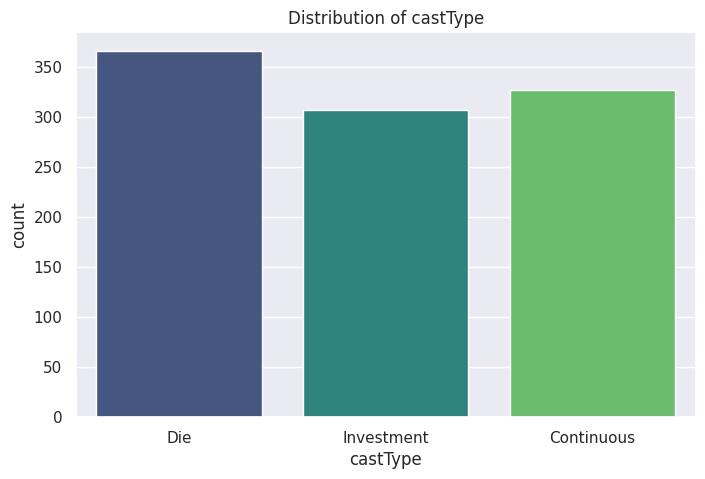

In [10]:
# Visualize distributions of categorical features
for feature in categorical_features:
    plt.figure(figsize=(8, 5))
    sns.countplot(x=feature, data=data,hue=feature, palette='viridis')
    plt.title(f'Distribution of {feature}')
    plt.show()

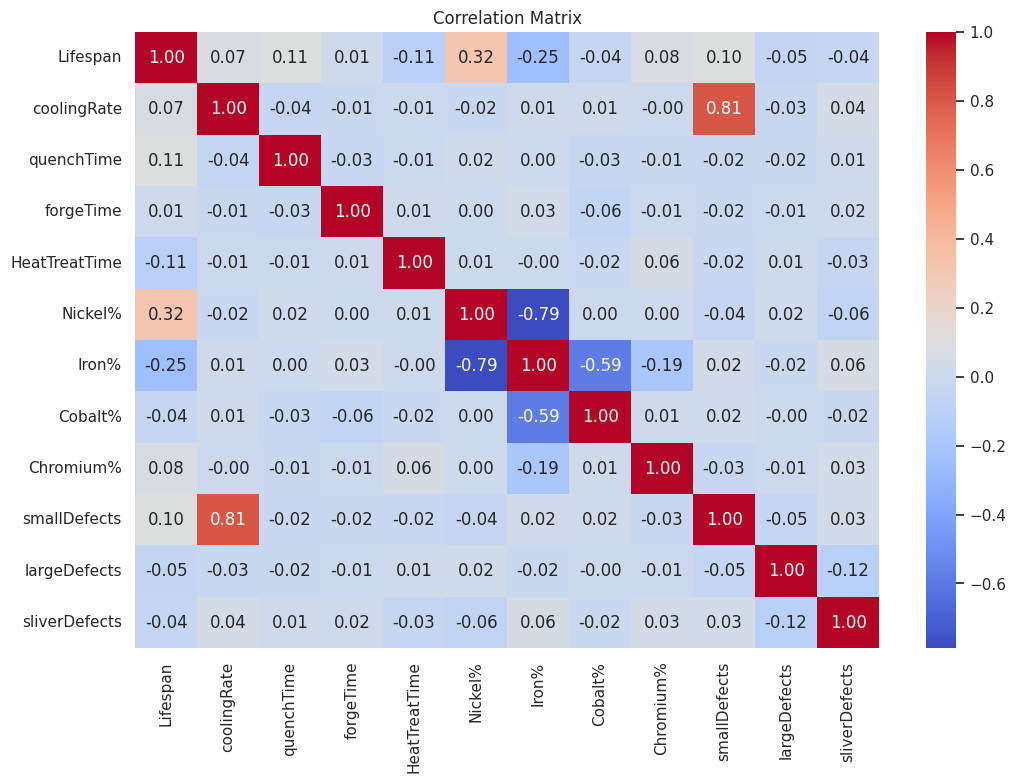

In [11]:
# Correlation heatmap for numerical features

datanumeric = data.select_dtypes(include=['int64', 'float64'])
plt.figure(figsize=(12, 8))

sns.heatmap(datanumeric.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


In [12]:
# Identify categorical and numerical features
categorical_features = data.select_dtypes(include=['object']).columns.tolist()  # Non-numeric features
numerical_features = data.select_dtypes(include=['number']).columns.tolist()  # Numeric features

# Display the identified features
print("Categorical Features:", categorical_features)
print("Numerical Features:", numerical_features)


Categorical Features: ['partType', 'microstructure', 'seedLocation', 'castType']
Numerical Features: ['Lifespan', 'coolingRate', 'quenchTime', 'forgeTime', 'HeatTreatTime', 'Nickel%', 'Iron%', 'Cobalt%', 'Chromium%', 'smallDefects', 'largeDefects', 'sliverDefects']


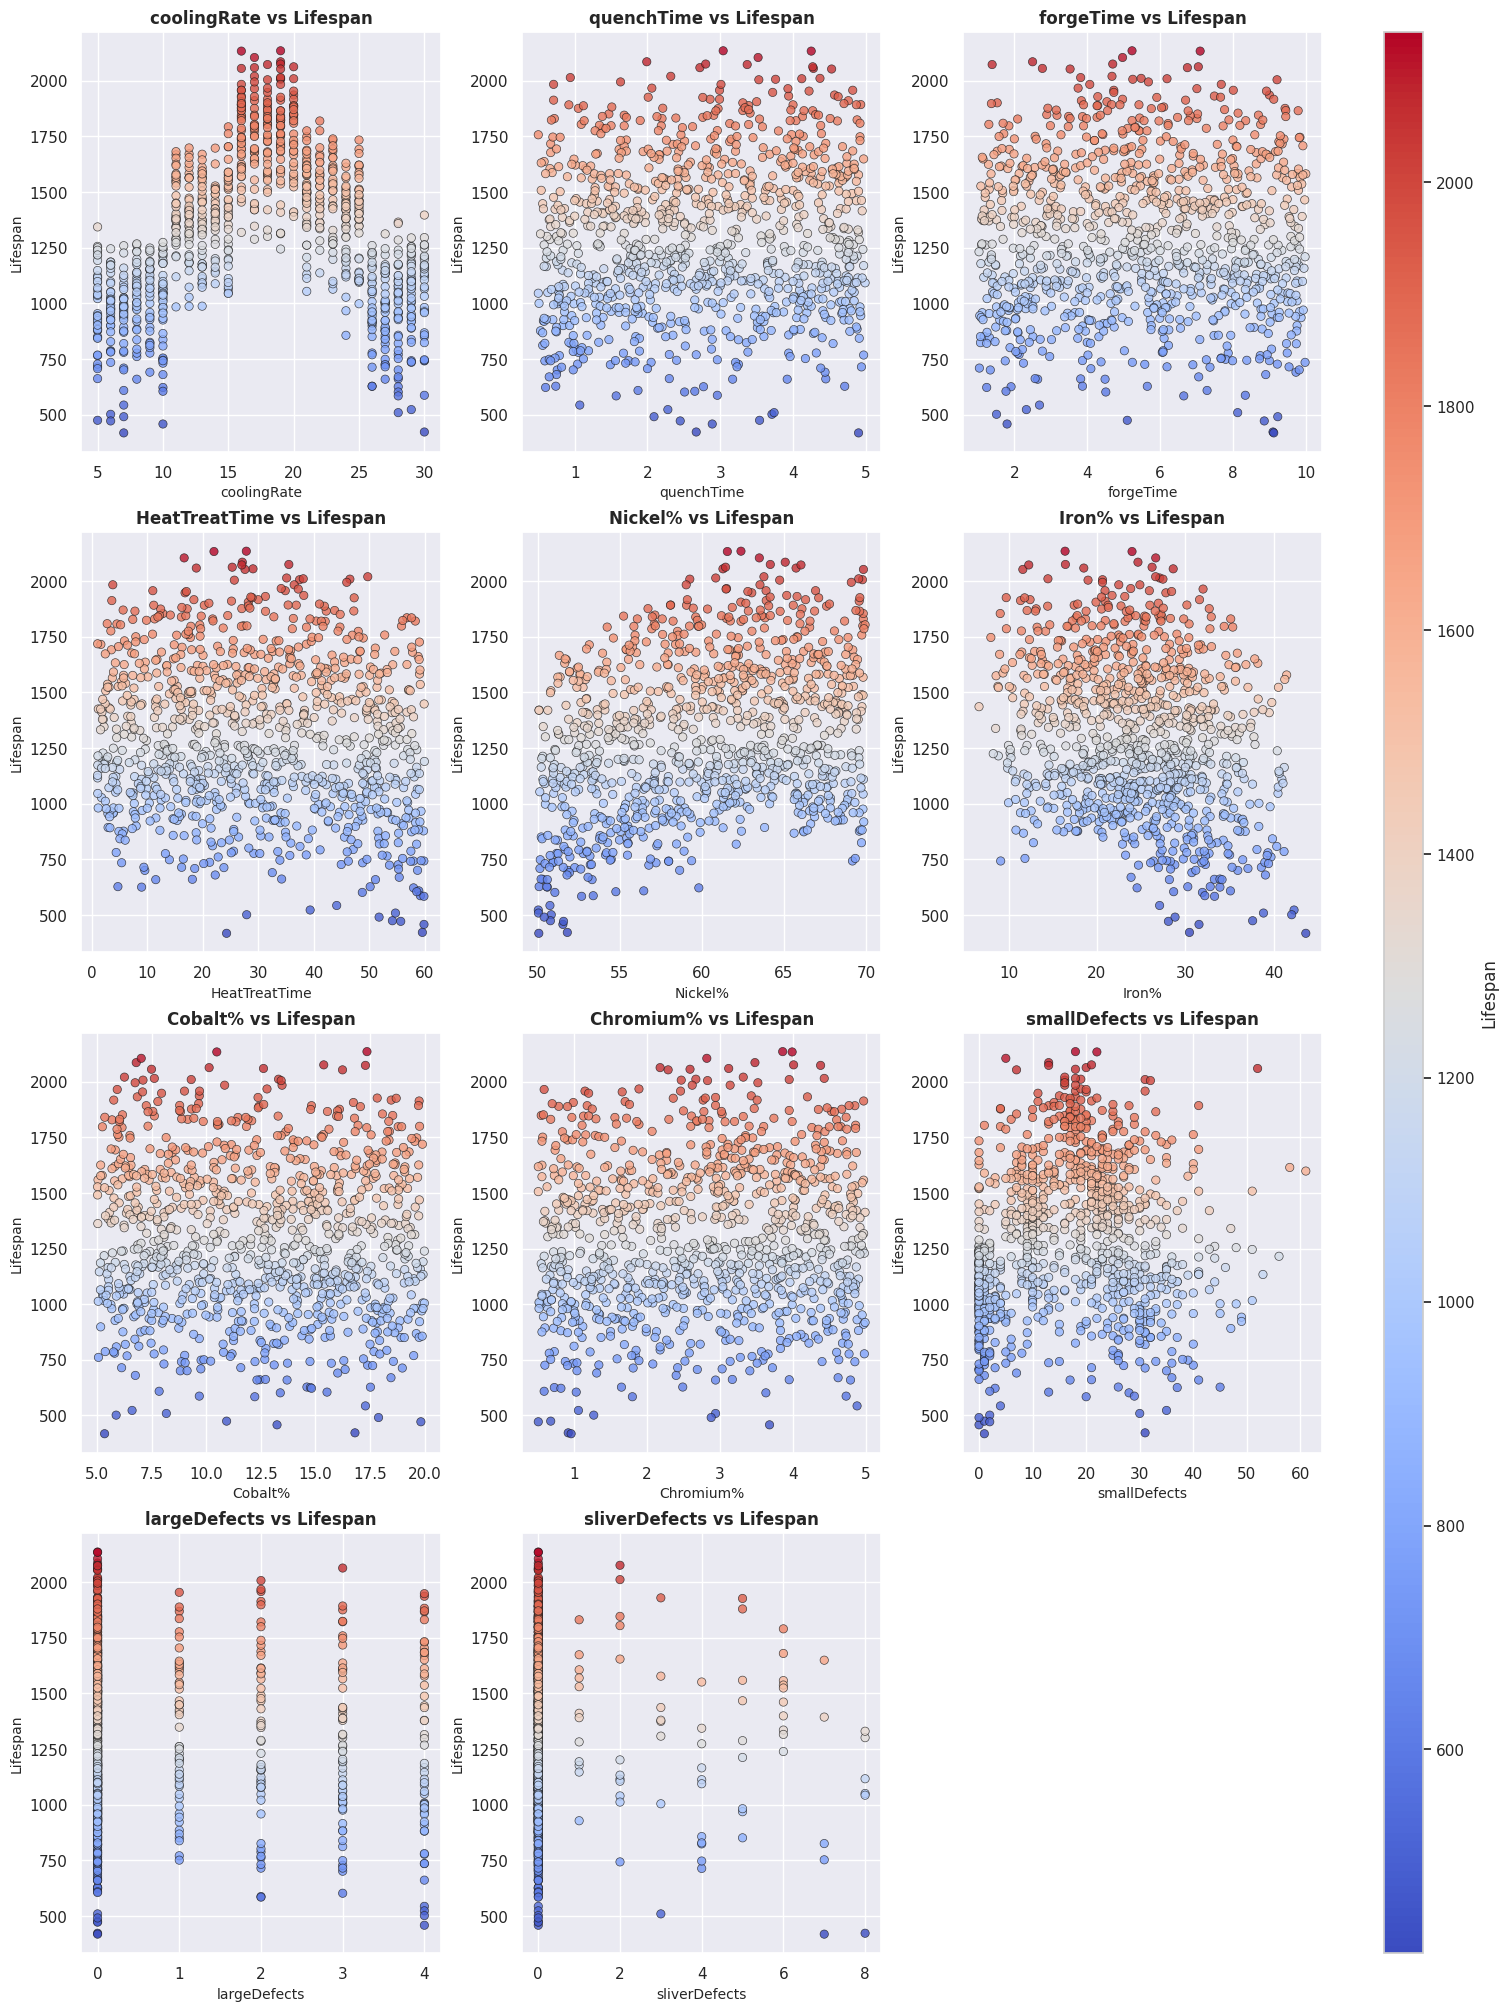

In [13]:
#Scatter plot numerical features vs lifespan
import math

# Get the numerical features except for the target variable
numerical_features = [col for col in data.select_dtypes(include=['float64', 'int64']).columns if col != 'Lifespan']

# Calculate number of rows and columns for the grid
num_features = len(numerical_features)
cols = 3  # Number of plots per row
rows = math.ceil(num_features / cols)  # Number of rows needed

# Set the figure size and grid layout
fig, axes = plt.subplots(rows, cols, figsize=(15, 5 * rows), constrained_layout=True)

# Flatten the axes array for easier indexing
axes = axes.flatten()

# Set Seaborn theme
sns.set_theme(style="whitegrid")

# Loop through each feature and plot
for idx, feature in enumerate(numerical_features):
    scatter = sns.scatterplot(
        ax=axes[idx],
        x=data[feature],
        y=data['Lifespan'],
        hue=data['Lifespan'],  # Use 'Lifespan' for coloring
        palette='coolwarm',
        alpha=0.8,
        edgecolor='k',
        legend=False
    )

    # Add title and axis labels
    axes[idx].set_title(f'{feature} vs Lifespan', fontsize=12, weight='bold')
    axes[idx].set_xlabel(feature, fontsize=10)
    axes[idx].set_ylabel('Lifespan', fontsize=10)

# Hide any unused subplots
for ax in axes[len(numerical_features):]:
    ax.axis('off')

# Add a colorbar to the figure
sm = plt.cm.ScalarMappable(cmap='coolwarm', norm=plt.Normalize(vmin=data['Lifespan'].min(), vmax=data['Lifespan'].max()))
cbar = fig.colorbar(sm, ax=axes, location='right', aspect=50, pad=0.05)
cbar.set_label('Lifespan', fontsize=12)

plt.show()


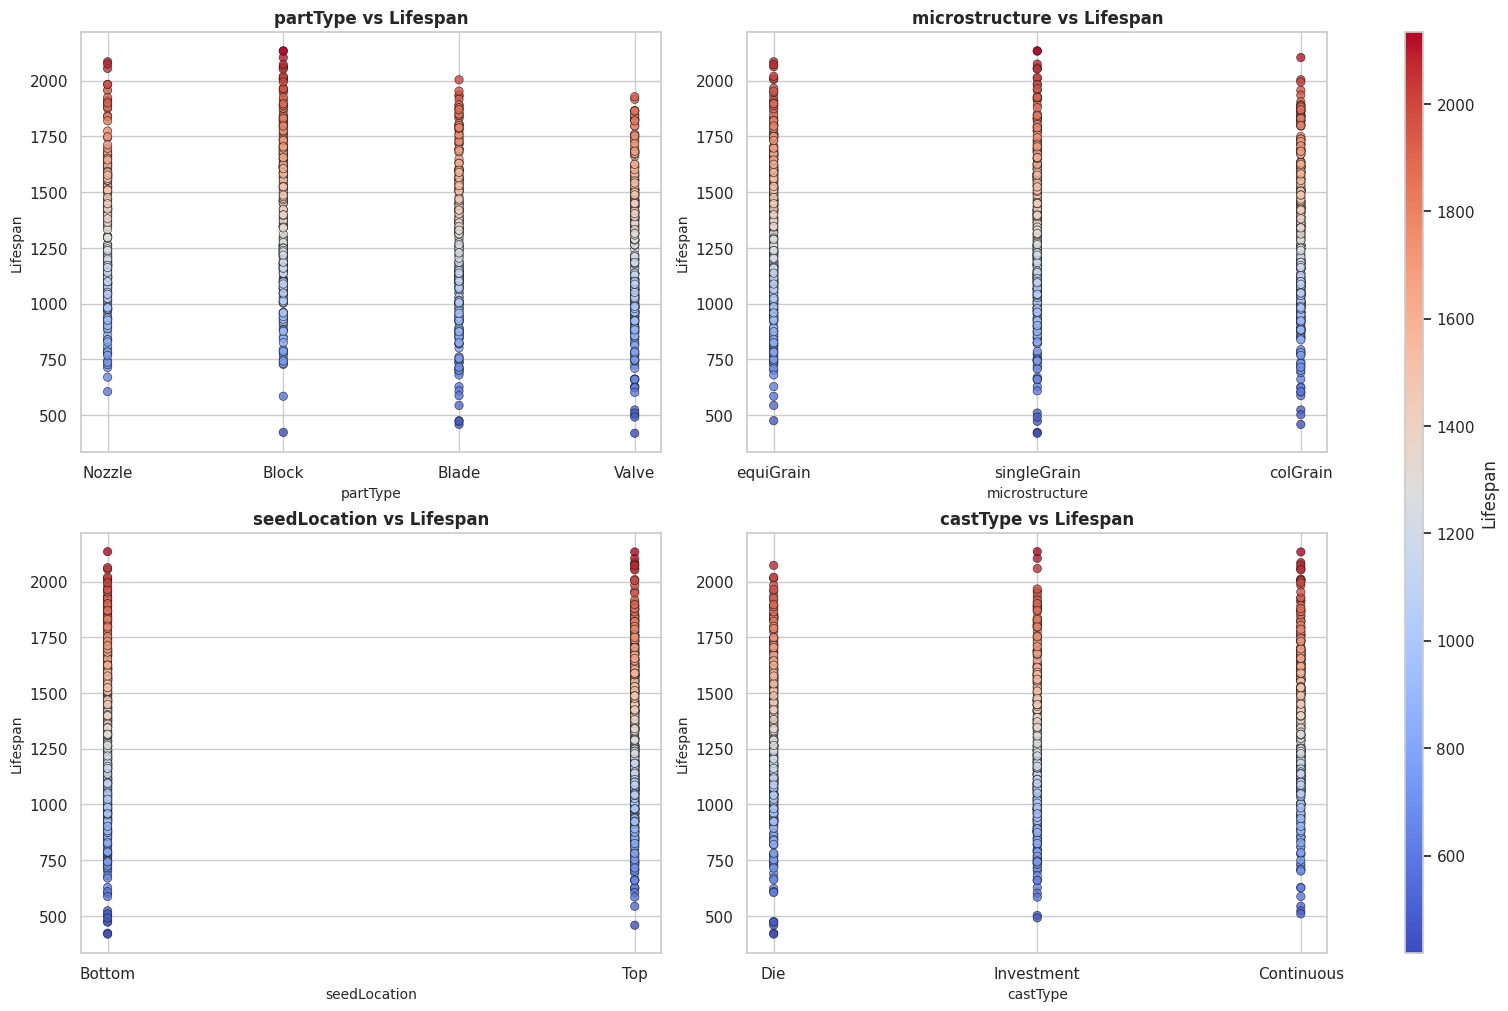

In [14]:
import math

# Get the numerical features except for the target variable
numerical_features = [col for col in data.select_dtypes(include=['float64', 'int64']).columns if col != 'Lifespan']

# Calculate number of rows and columns for the grid
num_features = len(categorical_features)
cols = 2  # Number of plots per row
rows = math.ceil(num_features / cols)  # Number of rows needed

# Set the figure size and grid layout
fig, axes = plt.subplots(rows, cols, figsize=(15, 5 * rows), constrained_layout=True)

# Flatten the axes array for easier indexing
axes = axes.flatten()

# Set Seaborn theme
sns.set_theme(style="whitegrid")

# Loop through each feature and plot
for idx, feature in enumerate(categorical_features):
    scatter = sns.scatterplot(
        ax=axes[idx],
        x=data[feature],
        y=data['Lifespan'],
        hue=data['Lifespan'],  # Use 'Lifespan' for coloring
        palette='coolwarm',
        alpha=0.8,
        edgecolor='k',
        legend=False
    )

    # Add title and axis labels
    axes[idx].set_title(f'{feature} vs Lifespan', fontsize=12, weight='bold')
    axes[idx].set_xlabel(feature, fontsize=10)
    axes[idx].set_ylabel('Lifespan', fontsize=10)

# Hide any unused subplots
for ax in axes[len(categorical_features):]:
    ax.axis('off')

# Add a colorbar to the figure
sm = plt.cm.ScalarMappable(cmap='coolwarm', norm=plt.Normalize(vmin=data['Lifespan'].min(), vmax=data['Lifespan'].max()))
cbar = fig.colorbar(sm, ax=axes, location='right', aspect=50, pad=0.05)
cbar.set_label('Lifespan', fontsize=12)

plt.show()


In [15]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

# Define the target column and features
target_column = 'Lifespan'
X = data.drop(columns=[target_column])
y = data[target_column]

# Automatically detect categorical and numerical features
categorical_features = X.select_dtypes(include=['object']).columns.tolist()
numerical_features = X.select_dtypes(include=['number']).columns.tolist()

# Print detected features
print("Categorical Features:", categorical_features)
print("Numerical Features:", numerical_features)

# Split the dataset into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),  # Scale numerical features
        ('cat', OneHotEncoder(drop='first'), categorical_features)  # One-hot encode categorical features
    ]
)

# Apply preprocessing to the training and testing sets
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

# Print the shapes of the processed data
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")


Categorical Features: ['partType', 'microstructure', 'seedLocation', 'castType']
Numerical Features: ['coolingRate', 'quenchTime', 'forgeTime', 'HeatTreatTime', 'Nickel%', 'Iron%', 'Cobalt%', 'Chromium%', 'smallDefects', 'largeDefects', 'sliverDefects']
Shape of X_train: (800, 19)
Shape of X_test: (200, 19)
Shape of y_train: (800,)
Shape of y_test: (200,)


In [16]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, explained_variance_score
import numpy as np
from scipy.stats import uniform

# Scaling the data (important for Ridge regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Ridge Regression Model
ridge = Ridge()

# Hyperparameter tuning using RandomizedSearchCV
# Define a wider distribution for alpha (log scale would often be more appropriate, but here we use a uniform distribution for simplicity)
ridge_params = {
    'alpha': uniform(0.1, 100)  # Randomized search over alpha in the range [0.1, 100]
}

# Perform RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=ridge, param_distributions=ridge_params, n_iter=100, cv=5, scoring='neg_mean_squared_error', random_state=42, n_jobs=-1)

# Fit the model
random_search.fit(X_train_scaled, y_train)

# Best hyperparameters found by RandomizedSearchCV
print("Best Parameters:", random_search.best_params_)

# Best model from RandomizedSearchCV
best_ridge_model = random_search.best_estimator_

# Predictions using the best model
y_train_pred = best_ridge_model.predict(X_train_scaled)
y_test_pred = best_ridge_model.predict(X_test_scaled)

# Evaluate the model on training and testing data
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
train_mae = mean_absolute_error(y_train, y_train_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)
train_explained_variance = explained_variance_score(y_train, y_train_pred)
test_explained_variance = explained_variance_score(y_test, y_test_pred)

# Print evaluation metrics
print(f"Train RMSE: {train_rmse}")
print(f"Test RMSE: {test_rmse}")
print(f"Train MAE: {train_mae}")
print(f"Test MAE: {test_mae}")
print(f"Train R²: {train_r2}")
print(f"Test R²: {test_r2}")
print(f"Train Explained Variance: {train_explained_variance}")
print(f"Test Explained Variance: {test_explained_variance}")


Best Parameters: {'alpha': 66.35222843539819}
Train RMSE: 306.4802970768733
Test RMSE: 300.01997922693323
Train MAE: 261.4550108061923
Test MAE: 253.21894063540793
Train R²: 0.20718947746556693
Test R²: 0.13081284044543373
Train Explained Variance: 0.20718947746556693
Test Explained Variance: 0.1377299709215305


In [17]:
ridge_grid = RandomizedSearchCV(ridge, ridge_params, cv=5, scoring='neg_mean_squared_error')
ridge_grid.fit(X_train_scaled, y_train)

RandomizedSearchCV(cv=5, estimator=Ridge(),
                   param_distributions={'alpha': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7b7a29bead40>},
                   scoring='neg_mean_squared_error')

Best Ridge Parameters: {'alpha': 62.36876997566669}
Ridge Regression Test RMSE: 300.09
Ridge Regression Test MAE: 253.30
Ridge Regression Test R²: 0.13
Ridge Regression Test Explained Variance: 0.14


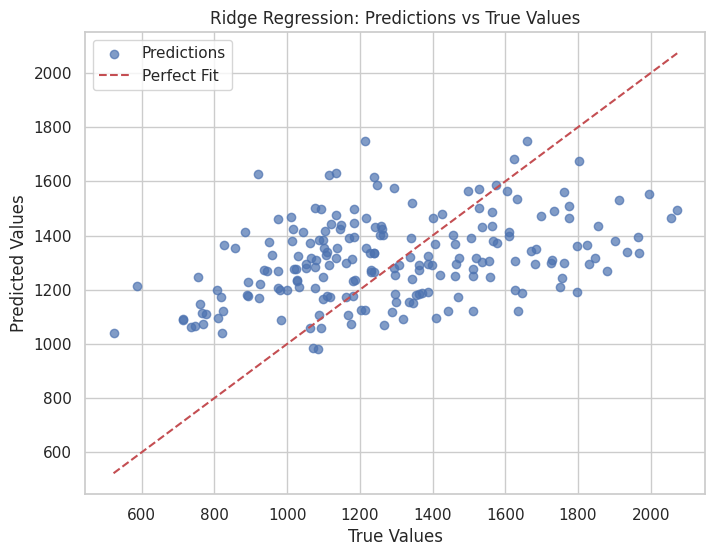

In [18]:
# Best Ridge Regression model and parameters
best_ridge = ridge_grid.best_estimator_
print("Best Ridge Parameters:", ridge_grid.best_params_)

# Evaluate on test set
ridge_preds = best_ridge.predict(X_test_scaled)

# Calculate evaluation metrics
ridge_rmse = np.sqrt(mean_squared_error(y_test, ridge_preds))
ridge_mae = mean_absolute_error(y_test, ridge_preds)
ridge_r2 = r2_score(y_test, ridge_preds)
ridge_explained_variance = explained_variance_score(y_test, ridge_preds)

# Print evaluation metrics
print(f"Ridge Regression Test RMSE: {ridge_rmse:.2f}")
print(f"Ridge Regression Test MAE: {ridge_mae:.2f}")
print(f"Ridge Regression Test R²: {ridge_r2:.2f}")
print(f"Ridge Regression Test Explained Variance: {ridge_explained_variance:.2f}")
# Ridge Regression: Predictions vs True Values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, ridge_preds, alpha=0.7, label='Predictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Perfect Fit')
plt.title('Ridge Regression: Predictions vs True Values')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

In [22]:
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, explained_variance_score
import numpy as np

# XGBoost Regressor Model
xgb_model = xgb.XGBRegressor(random_state=42)

# Reduced hyperparameter tuning using RandomizedSearchCV for faster results
xgb_params = {
    'n_estimators': [100, 200, 300],  # Limited to a smaller number of trees for faster results
    'learning_rate': [0.01, 0.05, 0.1],  # A limited range of learning rates
    'max_depth': [3, 5, 7],  # Exploring only three tree depths
    'min_child_weight': [1, 3],  # Limited range to avoid too many combinations
    'subsample': [0.7, 0.8, 1.0],  # Testing three values for subsample
    'colsample_bytree': [0.7, 0.8, 1.0],  # Testing three values for colsample_bytree
    'gamma': [0, 0.1],  # Reduced range of gamma values for faster testing
    'reg_alpha': [0, 0.1],  # L2 regularization with fewer values
    'reg_lambda': [0, 0.1]  # L1 regularization with fewer values
}

# RandomizedSearchCV for faster hyperparameter tuning
xgb_random = RandomizedSearchCV(xgb_model, xgb_params, cv=5, scoring='neg_mean_squared_error',
                                n_iter=10, verbose=2, random_state=42, n_jobs=-1)
xgb_random.fit(X_train, y_train)

# Best model
best_xgb = xgb_random.best_estimator_
print("Best XGBoost Parameters:", xgb_random.best_params_)

# Evaluate on test set
xgb_preds = best_xgb.predict(X_test)
xgb_rmse = np.sqrt(mean_squared_error(y_test, xgb_preds))
xgb_mae = mean_absolute_error(y_test, xgb_preds)
xgb_r2 = r2_score(y_test, xgb_preds)
xgb_explained_variance = explained_variance_score(y_test, xgb_preds)

print(f"XGBoost Regressor Test RMSE: {xgb_rmse:.2f}")
print(f"XGBoost Regressor Test MAE: {xgb_mae:.2f}")
print(f"XGBoost Regressor Test R²: {xgb_r2:.2f}")
print(f"XGBoost Regressor Test Explained Variance: {xgb_explained_variance:.2f}")


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best XGBoost Parameters: {'subsample': 1.0, 'reg_lambda': 0, 'reg_alpha': 0.1, 'n_estimators': 300, 'min_child_weight': 3, 'max_depth': 3, 'learning_rate': 0.1, 'gamma': 0, 'colsample_bytree': 1.0}
XGBoost Regressor Test RMSE: 39.28
XGBoost Regressor Test MAE: 31.09
XGBoost Regressor Test R²: 0.99
XGBoost Regressor Test Explained Variance: 0.99


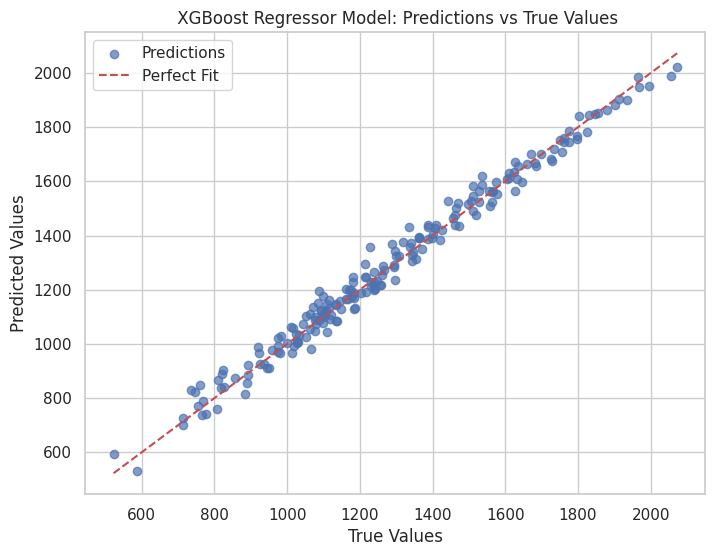

In [23]:
#  XGBoost Regressor Model: Predictions vs True Values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, xgb_preds, alpha=0.7, label='Predictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Perfect Fit')
plt.title(' XGBoost Regressor Model: Predictions vs True Values')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

In [27]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV, KFold
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, explained_variance_score
import numpy as np

# Random Forest Regressor Model
rf = RandomForestRegressor(random_state=42)

# Hyperparameter tuning using RandomizedSearchCV
rf_params = {
    'n_estimators': [50, 100, 200, 300, 500],  # More options for number of estimators
    'max_depth': [None, 10, 20, 30, 40, 50],    # Expand depth range
    'min_samples_split': [2, 5, 10, 15, 20],    # More options for splitting
    'min_samples_leaf': [1, 2, 4, 5, 10],       # More options for leaf size
    'max_features': ['sqrt', 'log2', None],  # More options for max features
    'bootstrap': [True, False],
    'warm_start': [True, False],  # Allow reuse of previous trees to increase estimators
    'random_state': [42]  # For reproducibility
}

# Implementing RandomizedSearchCV with KFold to ensure proper cross-validation for regression
kf = KFold(n_splits=5, shuffle=True, random_state=42)  # Using KFold for regression tasks

rf_random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=rf_params,  # Randomly sample from these parameters
    n_iter=100,  # Number of parameter combinations to test (increased for better exploration)
    cv=kf,        # Cross-validation strategy
    scoring='neg_mean_squared_error',  # Use negative MSE for regression
    n_jobs=-1,    # Use all available CPUs for faster processing
    verbose=2,    # Provide more detailed output during fitting
    random_state=42,
    error_score='raise'
)

# Fit the model with the training data
rf_random_search.fit(X_train, y_train)

# Best Random Forest model and parameters
best_rf = rf_random_search.best_estimator_
print("Best Random Forest Parameters:", rf_random_search.best_params_)

# Evaluate on test set
rf_preds = best_rf.predict(X_test)

# Evaluate using multiple metrics
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_preds))
rf_mae = mean_absolute_error(y_test, rf_preds)
rf_r2 = r2_score(y_test, rf_preds)
rf_explained_variance = explained_variance_score(y_test, rf_preds)

# Print evaluation metrics
print(f"Random Forest Regressor Test RMSE: {rf_rmse:.2f}")
print(f"Random Forest Regressor Test MAE: {rf_mae:.2f}")
print(f"Random Forest Regressor Test R²: {rf_r2:.2f}")
print(f"Random Forest Regressor Test Explained Variance: {rf_explained_variance:.2f}")


Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best Random Forest Parameters: {'warm_start': True, 'random_state': 42, 'n_estimators': 500, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': None, 'max_depth': None, 'bootstrap': True}
Random Forest Regressor Test RMSE: 86.13
Random Forest Regressor Test MAE: 68.48
Random Forest Regressor Test R²: 0.93
Random Forest Regressor Test Explained Variance: 0.93


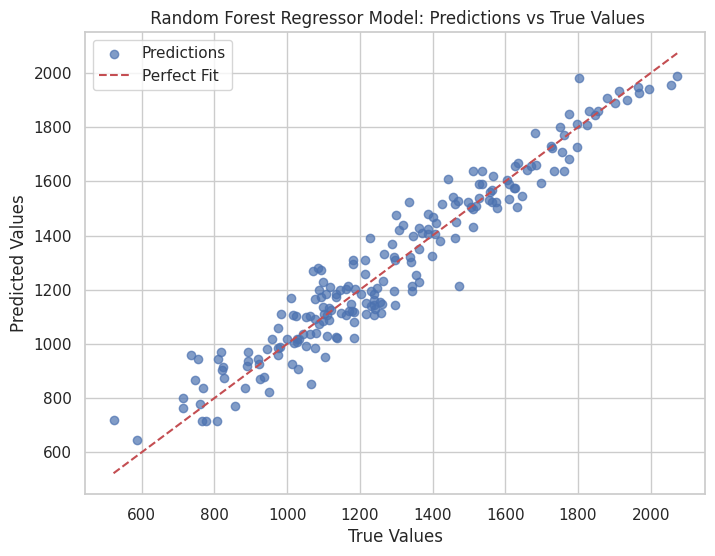

In [29]:
#  Random Forest Regressor  Model: Predictions vs True Values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, rf_preds, alpha=0.7, label='Predictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Perfect Fit')
plt.title(' Random Forest Regressor Model: Predictions vs True Values')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

In [30]:
# Summarize results in a DataFrame for comparison
results = {
    'Model': ['Ridge Regression', 'Random Forest Regressor', 'XGBoost Regressor'],
    #'Train Score': [ridge_train_score, rf_train_score, xgb_train_score],
    #'Test Score': [ridge_test_score, rf_test_score, xgb_test_score],
    'RMSE': [ridge_rmse, rf_rmse,xgb_rmse],
    'MAE': [ridge_mae, rf_mae,xgb_mae],
    'R²': [ridge_r2, rf_r2,xgb_r2],
    'Explained Variance': [ridge_explained_variance, rf_explained_variance,xgb_explained_variance]
}

results_df = pd.DataFrame(results)
results_df


,Model,RMSE,MAE,R²,Explained Variance
0,Ridge Regression,300.091482,253.303066,0.130398,0.137331
1,Random Forest Regressor,86.129146,68.478550,0.928367,0.928450
2,XGBoost Regressor,39.278167,31.091480,0.985102,0.985371


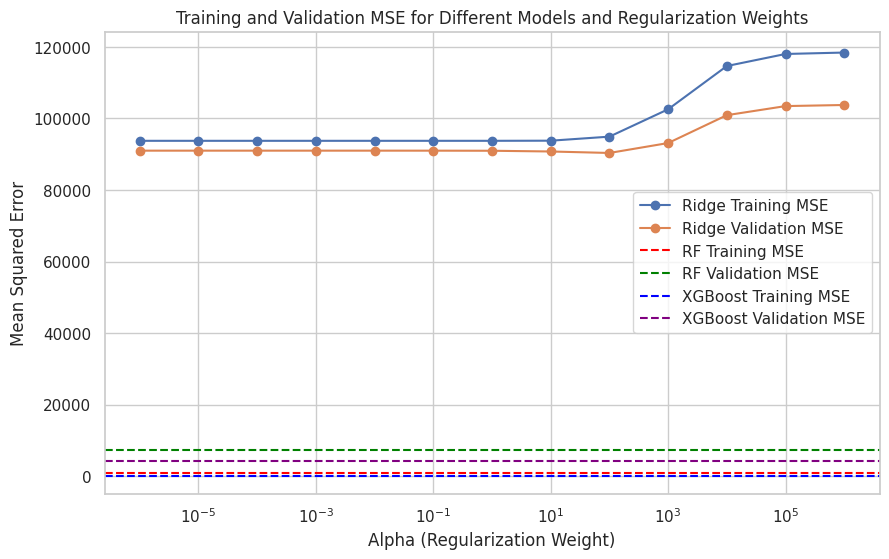

In [31]:
# Assuming 'data' is your DataFrame and 'Lifespan' is the target column
X = data.drop(columns=['Lifespan'])  # Drop target column to get features
y = data['Lifespan']  # Target column

# Automatically detect categorical and numerical features
categorical_features = X.select_dtypes(include=['object']).columns.tolist()
numerical_features = X.select_dtypes(include=['number']).columns.tolist()

# Preprocessing for numerical and categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),  # Scale numerical features
        ('cat', OneHotEncoder(drop='first'), categorical_features)  # One-hot encode categorical features
    ]
)

# Split data into training and validation sets (80% training, 20% validation)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply preprocessing to the features
X_train = preprocessor.fit_transform(X_train)
X_val = preprocessor.transform(X_val)

# List of alpha values to test for Ridge Regression (logarithmic scale from 1e-6 to 1e6)
alphas = np.logspace(-6, 6, 13)

# Initialize lists for storing errors
ridge_train_errors = []
ridge_val_errors = []
rf_train_errors = []
rf_val_errors = []
xgb_train_errors = []
xgb_val_errors = []

# Loop over alpha values for Ridge Regression
for alpha in alphas:
    # Ridge regression model
    ridge_model = Ridge(alpha=alpha)
    ridge_model.fit(X_train, y_train)

    # Predictions for training and validation sets
    ridge_train_pred = ridge_model.predict(X_train)
    ridge_val_pred = ridge_model.predict(X_val)

    # Calculate MSE for training and validation
    ridge_train_mse = mean_squared_error(y_train, ridge_train_pred)
    ridge_val_mse = mean_squared_error(y_val, ridge_val_pred)

    ridge_train_errors.append(ridge_train_mse)
    ridge_val_errors.append(ridge_val_mse)

# Now let's also compare Random Forest and XGBoost regression models:
# Initialize and train Random Forest Regressor and XGBoost Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

# Train Random Forest Model
rf_model.fit(X_train, y_train)
rf_train_pred = rf_model.predict(X_train)
rf_val_pred = rf_model.predict(X_val)
rf_train_mse = mean_squared_error(y_train, rf_train_pred)
rf_val_mse = mean_squared_error(y_val, rf_val_pred)

rf_train_errors.append(rf_train_mse)
rf_val_errors.append(rf_val_mse)

# Train XGBoost Model
xgb_model.fit(X_train, y_train)
xgb_train_pred = xgb_model.predict(X_train)
xgb_val_pred = xgb_model.predict(X_val)
xgb_train_mse = mean_squared_error(y_train, xgb_train_pred)
xgb_val_mse = mean_squared_error(y_val, xgb_val_pred)

xgb_train_errors.append(xgb_train_mse)
xgb_val_errors.append(xgb_val_mse)

# Now plot the MSE results for all models
plt.figure(figsize=(10, 6))
plt.plot(alphas, ridge_train_errors, label='Ridge Training MSE', marker='o')
plt.plot(alphas, ridge_val_errors, label='Ridge Validation MSE', marker='o')
plt.axhline(rf_train_errors[0], color='red', linestyle='--', label='RF Training MSE')  # Constant line for Random Forest
plt.axhline(rf_val_errors[0], color='green', linestyle='--', label='RF Validation MSE')  # Constant line for Random Forest
plt.axhline(xgb_train_errors[0], color='blue', linestyle='--', label='XGBoost Training MSE')  # Constant line for XGBoost
plt.axhline(xgb_val_errors[0], color='purple', linestyle='--', label='XGBoost Validation MSE')  # Constant line for XGBoost
plt.xscale('log')  # Use logarithmic scale for alpha
plt.xlabel('Alpha (Regularization Weight)')
plt.ylabel('Mean Squared Error')
plt.title('Training and Validation MSE for Different Models and Regularization Weights')
plt.legend()
plt.grid(True)
plt.show()


Explaination:
The plot visualizes the training and validation Mean Squared Error (MSE) for three different machine learning models (Ridge Regression, Random Forest, and XGBoost) across a range of regularization weights (alpha). The plot illustrates the trade-off between underfitting and overfitting. XGBoost demonstrates the best performance with the lowest validation MSE, indicating a good balance between bias and variance. Ridge Regression also performs relatively well, while Random Forest tends to overfit the training data.


# **Part 4: Classification Implementation**

In [32]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns


In [33]:
# Load the dataset
data = pd.read_csv('/content/COMP1801_Coursework_Dataset.csv')

# Display the first few rows and dataset shape
print("Dataset Shape:", data.shape)
print(data.head())


Dataset Shape: (1000, 16)
   Lifespan partType microstructure  coolingRate  quenchTime  forgeTime  \
0   1469.17   Nozzle      equiGrain           13        3.84       6.47   
1   1793.64    Block    singleGrain           19        2.62       3.48   
2    700.60    Blade      equiGrain           28        0.76       1.34   
3   1082.10   Nozzle       colGrain            9        2.01       2.19   
4   1838.83    Blade       colGrain           16        4.13       3.87   

   HeatTreatTime  Nickel%  Iron%  Cobalt%  Chromium%  smallDefects  \
0          46.87    65.73  16.52    16.82       0.93            10   
1          44.70    54.22  35.38     6.14       4.26            19   
2           9.54    51.83  35.95     8.81       3.41            35   
3          20.29    57.03  23.33    16.86       2.78             0   
4          16.13    59.62  27.37    11.45       1.56            10   

   largeDefects  sliverDefects seedLocation    castType  
0             0              0       Bottom 

In [34]:
# Display dataset info
print("Dataset Shape:", data.shape)
print("Columns:", data.columns)

Dataset Shape: (1000, 16)
Columns: Index(['Lifespan', 'partType', 'microstructure', 'coolingRate', 'quenchTime',
       'forgeTime', 'HeatTreatTime', 'Nickel%', 'Iron%', 'Cobalt%',
       'Chromium%', 'smallDefects', 'largeDefects', 'sliverDefects',
       'seedLocation', 'castType'],
      dtype='object')


In [35]:
# Create the binary target variable
data['usable'] = (data['Lifespan'] >= 1500).astype(int)

# Check the distribution of the new target
print(data['usable'].value_counts())


usable
0    694
1    306
Name: count, dtype: int64


**Clustering-Based Feature Crafting**

In [36]:
# Select numerical features related to lifespan prediction
clustering_features = data[['Lifespan', 'coolingRate', 'quenchTime', 'forgeTime', 'HeatTreatTime']]

# Standardize the features
scaler = StandardScaler()
clustering_features_scaled = scaler.fit_transform(clustering_features)


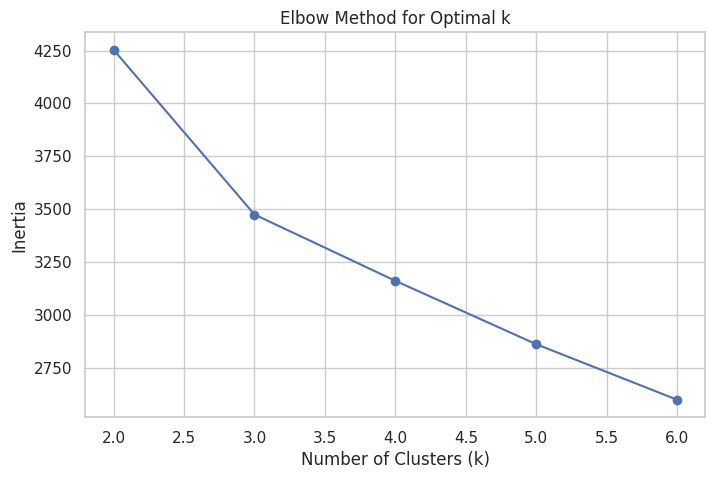

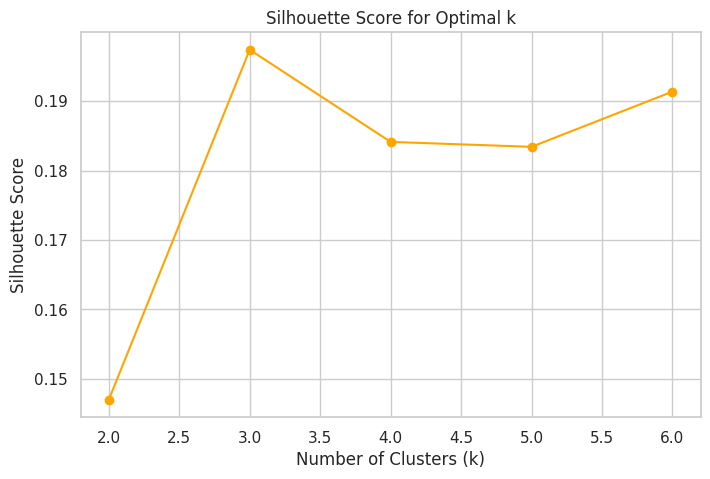

In [37]:
# Find optimal number of clusters using Elbow and Silhouette methods
inertia = []
silhouette_scores = []
k_values = range(2, 7)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(clustering_features_scaled)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(clustering_features_scaled, kmeans.labels_))

# Plot Elbow Method
plt.figure(figsize=(8, 5))
plt.plot(k_values, inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()

# Plot Silhouette Scores
plt.figure(figsize=(8, 5))
plt.plot(k_values, silhouette_scores, marker='o', color='orange')
plt.title('Silhouette Score for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.show()


<ipython-input-38-6abf837243ed>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data['Lifespan_clusters'], palette='viridis')


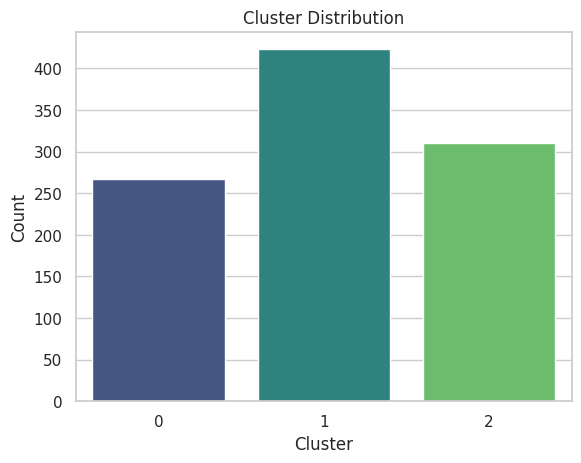

In [38]:
# Apply K-Means clustering with the chosen k
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
data['Lifespan_clusters'] = kmeans.fit_predict(clustering_features_scaled)

# Visualize the cluster distribution
sns.countplot(x=data['Lifespan_clusters'], palette='viridis')
plt.title('Cluster Distribution')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.show()


In [39]:
# Binary classification target
y_binary = data['usable']

# Multi-class clustering target
y_clusters = data['Lifespan_clusters']

# Drop unnecessary columns
X = data.drop(columns=['Lifespan', 'usable', 'Lifespan_clusters'])
X = pd.get_dummies(X, drop_first=True)  # One-hot encode categorical features


In [40]:
# Binary classification split
X_train_bin, X_test_bin, y_train_bin, y_test_bin = train_test_split(X, y_binary, test_size=0.2, random_state=42)

# Multi-class classification split
X_train_clust, X_test_clust, y_train_clust, y_test_clust = train_test_split(X, y_clusters, test_size=0.2, random_state=42)


<ipython-input-41-b5f36c39fceb>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_binary, palette='viridis')


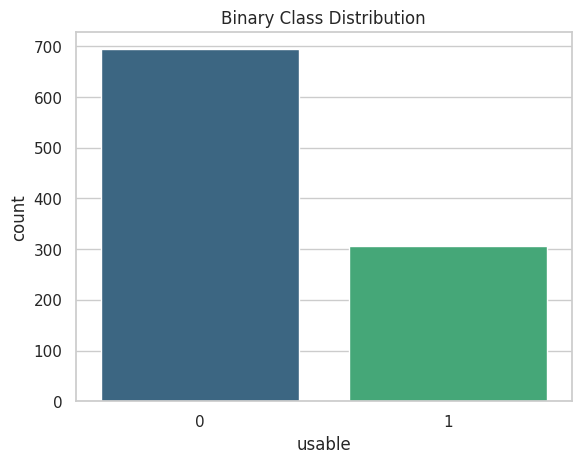

<ipython-input-41-b5f36c39fceb>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_clusters, palette='viridis')


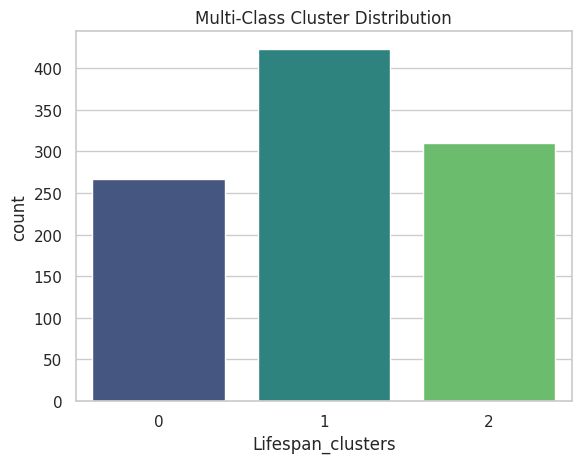

In [41]:
# Binary class balance
sns.countplot(x=y_binary, palette='viridis')
plt.title('Binary Class Distribution')
plt.show()

# Multi-class balance
sns.countplot(x=y_clusters, palette='viridis')
plt.title('Multi-Class Cluster Distribution')
plt.show()


In [42]:
# Apply SMOTE for multi-class
smote = SMOTE(random_state=42)
X_train_clust_bal, y_train_clust_bal = smote.fit_resample(X_train_clust, y_train_clust)


Logistic Regression Binary Classification:
Accuracy: 0.75
F1 Score: 0.4186046511627907


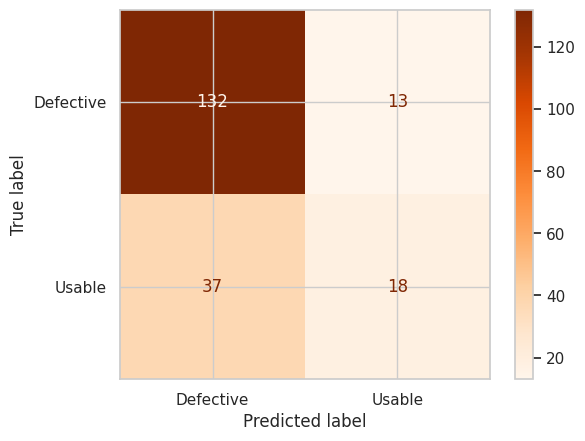

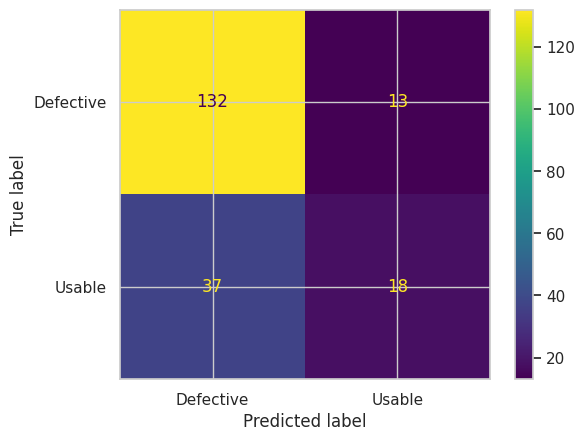

In [43]:
# Logistic Regression
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train_bin, y_train_bin)

# Predictions and Evaluation
log_reg_preds = log_reg.predict(X_test_bin)
print("Logistic Regression Binary Classification:")
print("Accuracy:", accuracy_score(y_test_bin, log_reg_preds))
print("F1 Score:", f1_score(y_test_bin, log_reg_preds))
ConfusionMatrixDisplay.from_estimator(log_reg, X_test_bin, y_test_bin, display_labels=['Defective', 'Usable'], cmap='Oranges').plot()
plt.show()


Gradient Boosting Binary Classification:
Accuracy: 0.94
F1 Score: 0.8947368421052632


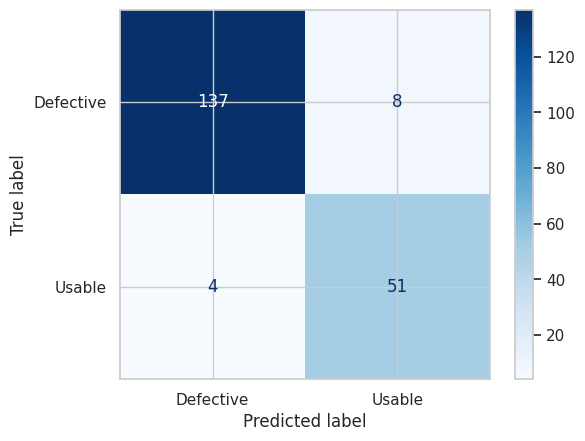

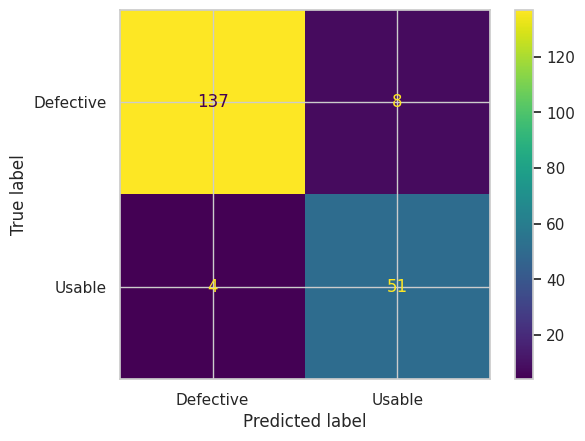

In [44]:
# Gradient Boosting
gb_clf = GradientBoostingClassifier(random_state=42)
gb_clf_params = {'n_estimators': [50, 100], 'learning_rate': [0.01, 0.1], 'max_depth': [3, 5]}
gb_clf_grid = GridSearchCV(gb_clf, gb_clf_params, cv=3, scoring='accuracy')
gb_clf_grid.fit(X_train_bin, y_train_bin)

# Best model
best_gb = gb_clf_grid.best_estimator_
gb_preds = best_gb.predict(X_test_bin)
print("Gradient Boosting Binary Classification:")
print("Accuracy:", accuracy_score(y_test_bin, gb_preds))
print("F1 Score:", f1_score(y_test_bin, gb_preds))
ConfusionMatrixDisplay.from_estimator(best_gb, X_test_bin, y_test_bin, display_labels=['Defective', 'Usable'], cmap='Blues').plot()
plt.show()


In [45]:
# Logistic Regression
multi_log = LogisticRegression(random_state=42, multi_class='multinomial')
multi_log.fit(X_train_clust_bal, y_train_clust_bal)

# Predictions and Evaluation
multi_log_preds = multi_log.predict(X_test_clust)
print("Logistic Regression Multi-Class Classification:")
print(classification_report(y_test_clust, multi_log_preds))


Logistic Regression Multi-Class Classification:
              precision    recall  f1-score   support

           0       0.93      0.97      0.95        58
           1       0.91      0.90      0.90        77
           2       0.94      0.92      0.93        65

    accuracy                           0.93       200
   macro avg       0.93      0.93      0.93       200
weighted avg       0.92      0.93      0.92       200



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [46]:
# Random Forest
rf_clf_params = {'n_estimators': [50, 100, 200], 'max_depth': [5, 10, 15]}
rf_clf_grid = GridSearchCV(RandomForestClassifier(random_state=42), rf_clf_params, cv=3, scoring='accuracy')
rf_clf_grid.fit(X_train_clust_bal, y_train_clust_bal)
best_rf_clf = rf_clf_grid.best_estimator_
rf_preds = best_rf_clf.predict(X_test_clust)

print("Random Forest Multi-Class Classification:")
print(classification_report(y_test_clust, rf_preds))


Random Forest Multi-Class Classification:
              precision    recall  f1-score   support

           0       0.98      0.93      0.96        58
           1       0.88      0.94      0.91        77
           2       0.94      0.91      0.92        65

    accuracy                           0.93       200
   macro avg       0.93      0.92      0.93       200
weighted avg       0.93      0.93      0.93       200



                             Model  Accuracy  F1 Score
0       Binary Logistic Regression     0.750  0.418605
1         Binary Gradient Boosting     0.940  0.940633
2  Multi-Class Logistic Regression     0.925  0.924835
3        Multi-Class Random Forest     0.925  0.925457


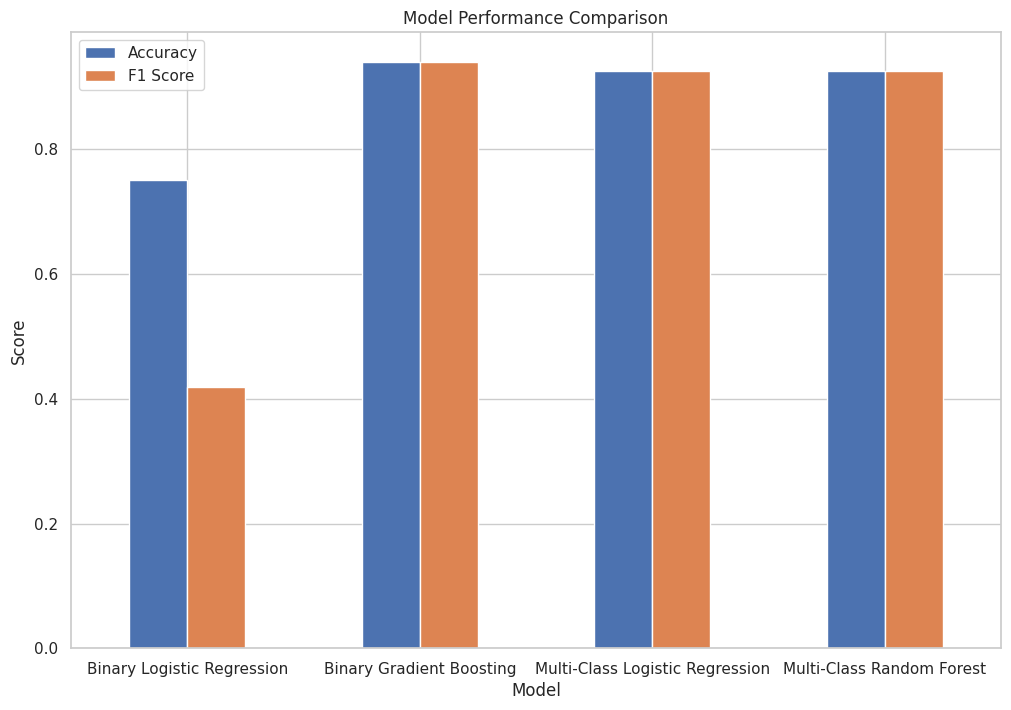

In [47]:
# Results Summary
results = {
    'Model': ['Binary Logistic Regression', 'Binary Gradient Boosting', 'Multi-Class Logistic Regression', 'Multi-Class Random Forest'],
    'Accuracy': [accuracy_score(y_test_bin, log_reg_preds), accuracy_score(y_test_bin, gb_preds),
                 accuracy_score(y_test_clust, multi_log_preds), accuracy_score(y_test_clust, rf_preds)],
    'F1 Score': [f1_score(y_test_bin, log_reg_preds), f1_score(y_test_bin, gb_preds, average='weighted'),
                 f1_score(y_test_clust, multi_log_preds, average='weighted'), f1_score(y_test_clust, rf_preds, average='weighted')]
}
results_df = pd.DataFrame(results)
print(results_df)
results_df.set_index('Model').plot(kind='bar', figsize=(12, 8))
plt.title('Model Performance Comparison')
plt.ylabel('Score')
plt.xticks(rotation=0)
plt.show()
